In [1]:
import pandas as pd 
df = pd.read_csv('models.csv')


In [2]:
print(df.columns)
print(df.info())
col=df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [3]:
df.head(5)



,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
column_names = list(df.columns)

## To check number of unique in each column

In [5]:
for i,item in enumerate(column_names):
  print(f'{item}-->\n')
  print(df[column_names[i]].value_counts())
  print("\n")
  print(df[column_names[i]].nunique())
 

  

mpg-->

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: mpg, Length: 129, dtype: int64


129
cylinders-->

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64


5
displacement-->

97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: displacement, Length: 82, dtype: int64


82
horsepower-->

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64


94
weight-->

1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: weight, Length: 351, dtype: int64


351
acceleration-->

14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: acceleration, Length: 95, dtype: int64


95
model ye

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [7]:
from scipy.stats import pearsonr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random

In [8]:
df1=df

## **Use regular expression to extract only 2-3 first characters from column car name** 🚗 

In [64]:
import re

In [9]:
df1['Type'] = df['car name'].str.extract('(.{2,3})', expand=False)
print(df1['Type'].T.value_counts())

for    51
che    47
ply    31
amc    28
dod    28
toy    26
dat    23
vol    21
bui    17
pon    16
mer    14
hon    13
maz    10
old    10
peu     8
fia     8
aud     7
chr     6
vw      6
ren     5
ope     4
saa     4
sub     4
max     2
bmw     2
cad     2
hi      1
cap     1
vok     1
tri     1
nis     1
Name: Type, dtype: int64


In [10]:
df1['Type'] = df['Type'].astype('category')
 
# save new version of category codes
df1['Type'] = df['Type'].cat.codes

## To clean horsepower column

In [ ]:
df1['horsepower']=df1['horsepower'].replace('?','150')
df1['horsepower']=df1['horsepower'].astype('int')

In [51]:
print(df1['horsepower'].unique)

<bound method Series.unique of 0      130
1      165
2      150
3      150
4      140
      ... 
393     86
394     52
395     84
396     79
397     82
Name: horsepower, Length: 398, dtype: int64>


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
 9   Type          398 non-null    int8   
dtypes: float64(3), int64(5), int8(1), object(1)
memory usage: 28.5+ KB


In [53]:
df1['horsepower'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160,  95,  97,
        85,  88,  46,  87,  90, 113, 200, 210, 193, 100, 105, 175, 153,
       180, 110,  72,  86,  70,  76,  65,  69,  60,  80,  54, 208, 155,
       112,  92, 145, 137, 158, 167,  94, 107, 230,  49,  75,  91, 122,
        67,  83,  78,  52,  61,  93, 148, 129,  96,  71,  98, 115,  53,
        81,  79, 120, 152, 102, 108,  68,  58, 149,  89,  63,  48,  66,
       139, 103, 125, 133, 138, 135, 142,  77,  62, 132,  84,  64,  74,
       116,  82])

In [55]:
df1.drop(labels="car name", axis=1, inplace=True)

df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Type
0,18.0,8,307.0,130,3504,12.0,70,1,6
1,15.0,8,350.0,165,3693,11.5,70,1,3
2,18.0,8,318.0,150,3436,11.0,70,1,21
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,11


In [56]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

##**1-Mutual information as Assignment required(x=data,y=mpg)**





## **I(X ; Y) = H(X) — H(X | Y)**









In [78]:
df_temp=df1

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp.drop(labels=['mpg'], axis=1),
    df_temp['mpg'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.56049991, 0.7834542 , 0.71731231, 0.77523539, 0.13261398,
       0.29481409, 0.24267984, 0.21358316])

## Highly Mutual information gain
Target = mpg

In [122]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
m1=mutual_info.sort_values(ascending=False).to_frame()

In [123]:
from google.colab import data_table

data_table.enable_dataframe_formatter()
data_table.DataTable(m1, include_index=True)

,0
displacement,0.783454
weight,0.775235
horsepower,0.717312
cylinders,0.560500
model year,0.294814
origin,0.242680
Type,0.213583
acceleration,0.132614


##**2-Mutual information as Assignment required(x=data,y=displacement)**

In [125]:
df_temp1=df1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


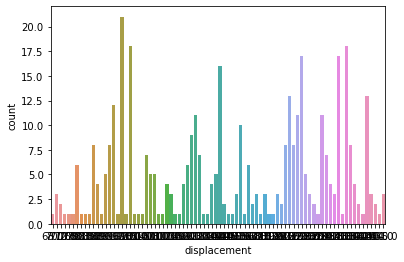

In [131]:
sns.countplot(df_temp1['displacement']) # We should here turn to discrete as it is the target

In [140]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           398 non-null    float64 
 1   cylinders     398 non-null    int64   
 2   displacement  398 non-null    category
 3   horsepower    398 non-null    int64   
 4   weight        398 non-null    int64   
 5   acceleration  398 non-null    float64 
 6   model year    398 non-null    int64   
 7   origin        398 non-null    int64   
 8   Type          398 non-null    int8    
dtypes: category(1), float64(2), int64(5), int8(1)
memory usage: 22.9 KB


In [149]:
df_temp1['displacement']=df_temp1['displacement'].cat.codes

In [150]:
df_temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    int8   
 3   horsepower    398 non-null    int64  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   Type          398 non-null    int8   
dtypes: float64(2), int64(5), int8(2)
memory usage: 22.7 KB


In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp1, df_temp1['displacement'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.63570915, 0.82320876, 1.64020157, 0.7304797 , 0.93577007,
       0.20017386, 0.0855606 , 0.32673863, 0.35972083])

## Highly Mutual information gain
**target = displacement**

In [152]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m2=mutual_info.sort_values(ascending=False).to_frame()
m2

,0
displacement,1.640202
weight,0.935770
cylinders,0.823209
horsepower,0.730480
mpg,0.635709
Type,0.359721
origin,0.326739
acceleration,0.200174
model year,0.085561


##**3-Mutual information as Assignment required(x=data,y=cylinders)**

In [153]:
df_temp2=df1

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp2.drop(labels=['cylinders'], axis=1),
    df_temp2['cylinders'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.53070992, 0.83156221, 0.62176275, 0.69320031, 0.22605598,
       0.12703738, 0.26831269, 0.20275092])

In [155]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m3=mutual_info.sort_values(ascending=False).to_frame()
m3

,0
displacement,0.831562
weight,0.693200
horsepower,0.621763
mpg,0.530710
origin,0.268313
acceleration,0.226056
Type,0.202751
model year,0.127037


##**4-Mutual information as Assignment required(x=data,y=weight)**

In [156]:
df_temp3=df1

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp3.drop(labels=['weight'], axis=1),
    df_temp3['weight'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.79214811, 0.6880968 , 0.94030413, 0.79733224, 0.14559669,
       0.16550332, 0.26056711, 0.16078898])

In [158]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m4=mutual_info.sort_values(ascending=False).to_frame()
m4

,0
displacement,0.940304
horsepower,0.797332
mpg,0.792148
cylinders,0.688097
origin,0.260567
model year,0.165503
Type,0.160789
acceleration,0.145597


##**5-Mutual information as Assignment required(x=data,y=horsepower)**

In [159]:
df_temp4=df1

In [160]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp4.drop(labels=['horsepower'], axis=1),
    df_temp4['horsepower'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.73939659, 0.68574292, 0.75896749, 0.8003739 , 0.3250427 ,
       0.22309322, 0.31916568, 0.42429563])

In [161]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m5=mutual_info.sort_values(ascending=False).to_frame()
m5

,0
weight,0.800374
displacement,0.758967
mpg,0.739397
cylinders,0.685743
Type,0.424296
acceleration,0.325043
origin,0.319166
model year,0.223093


##**6-Mutual information as Assignment required(x=data,y=acceleration)**

In [163]:
df_temp5=df1

In [164]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp5.drop(labels=['acceleration'], axis=1),
    df_temp5['acceleration'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.14624436, 0.22289052, 0.19554837, 0.30907361, 0.16818006,
       0.04683496, 0.08098417, 0.0406512 ])

In [166]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m5=mutual_info.sort_values(ascending=False).to_frame()
m5

,0
horsepower,0.309074
cylinders,0.222891
displacement,0.195548
weight,0.168180
mpg,0.146244
origin,0.080984
model year,0.046835
Type,0.040651


##**7-Mutual information as Assignment required(x=data,y=origin)**

In [168]:
df_temp6=df1

In [169]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp6.drop(labels=['origin'], axis=1),
    df_temp6['origin'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.18172519, 0.32229184, 0.29801911, 0.32620247, 0.26334895,
       0.11576109, 0.02994163, 0.82833741])

In [170]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m6=mutual_info.sort_values(ascending=False).to_frame()
m6

,0
Type,0.828337
horsepower,0.326202
cylinders,0.322292
displacement,0.298019
weight,0.263349
mpg,0.181725
acceleration,0.115761
model year,0.029942


##**8-Mutual information as Assignment required(x=data,y=model year)**

In [ ]:
df_temp7=df1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp7.drop(labels=['model year'], axis=1),
    df_temp7['model year'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.3091082 , 0.08153791, 0.07698712, 0.23386751, 0.15912621,
       0.05708936, 0.04178806, 0.        ])

In [ ]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m7=mutual_info.sort_values(ascending=False).to_frame()
m7

,0
mpg,0.309108
horsepower,0.233868
weight,0.159126
cylinders,0.081538
displacement,0.076987
acceleration,0.057089
origin,0.041788
Type,0.000000


##**9-Mutual information as Assignment required(x=data,y=Type)**

In [174]:
df_temp8=df1

In [175]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_temp8.drop(labels=['Type'], axis=1),
    df_temp8['Type'],
    test_size=0.3,
    random_state=0)
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.21585391, 0.2229849 , 0.33500552, 0.41323777, 0.17744422,
       0.02772262, 0.02386089, 0.85473016])

In [176]:
mutual_info = pd.Series(mutual_info)

mutual_info.index= X_train.columns

m8=mutual_info.sort_values(ascending=False).to_frame()
m8

,0
origin,0.854730
horsepower,0.413238
displacement,0.335006
cylinders,0.222985
mpg,0.215854
weight,0.177444
acceleration,0.027723
model year,0.023861


### **Use Pearson correlation which represent Maximal information criterion (MIC) as in our book 📘 page(60)**

In [63]:
df1.corr(method ='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Type
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450,0.288368
cylinders,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543,-0.286512
displacement,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409,-0.302291
horsepower,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271,-0.236643
weight,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024,-0.265872
acceleration,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873,0.138012
model year,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662,0.077134
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000,0.374745
Type,0.288368,-0.286512,-0.302291,-0.236643,-0.265872,0.138012,0.077134,0.374745,1.000000


<Figure size 1800x1800 with 0 Axes>

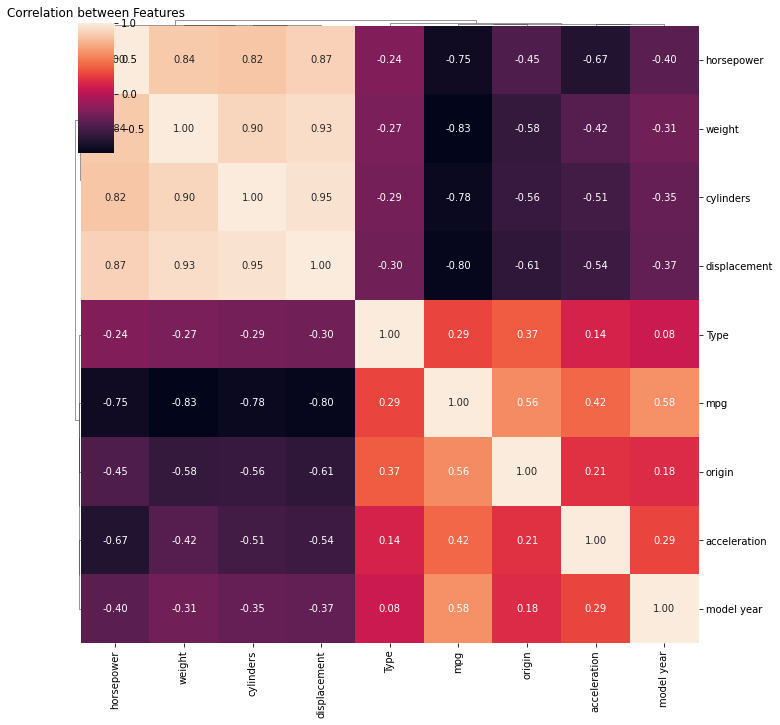

In [71]:
corr_matrix = df1.corr(method='pearson')


plt.figure(figsize=(25,25))
sns.clustermap(corr_matrix, annot=True, fmt = ".2f", dendrogram_ratio=0.01)

plt.title("Correlation between Features")
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 <a list of 9 Text major ticklabel objects>)

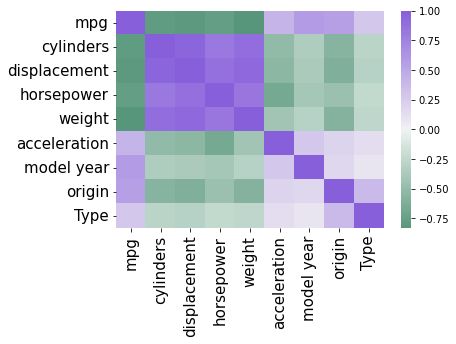

In [21]:
colors = sns.diverging_palette(150, 275, as_cmap=True)

# Create heatmap using the .corr method on df, set colormap to cmap
sns.heatmap(df1.corr(), center=0, cmap=colors)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

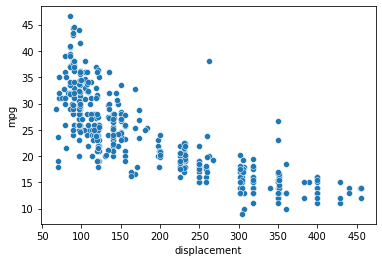

In [15]:
sns.scatterplot(x='displacement', y='mpg', data=df)


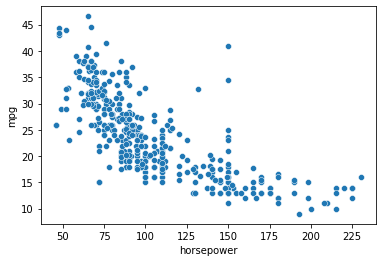

In [14]:
sns.scatterplot(x='horsepower', y='mpg', data=df)

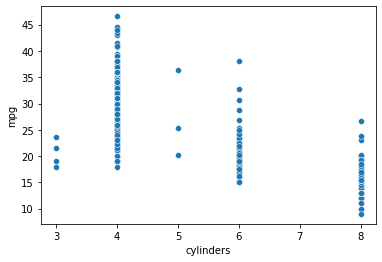

In [16]:
sns.scatterplot(x='cylinders', y='mpg', data=df)

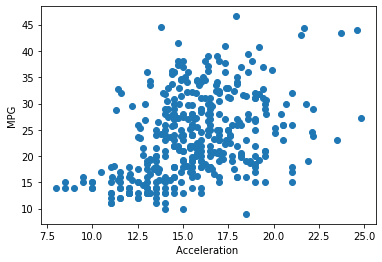

In [18]:
plt.scatter(x = df.acceleration, y = df.mpg)
plt.xlabel('Acceleration ')
plt.ylabel('MPG')
plt.show()

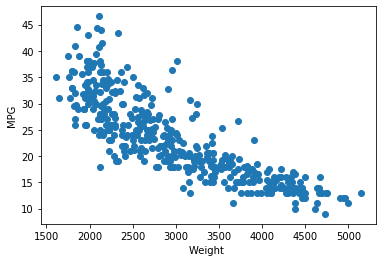

In [19]:
plt.scatter(x = df.weight, y = df.mpg)
plt.xlabel('Weight ')
plt.ylabel('MPG')
plt.show()

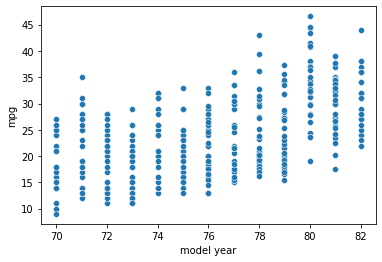

In [17]:
sns.scatterplot(x='model year', y='mpg', data=df)

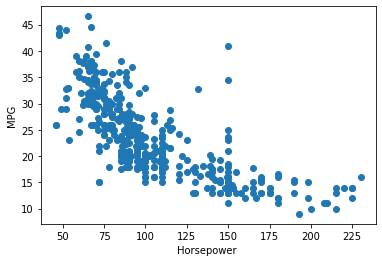

In [20]:
plt.scatter(x = df.horsepower, y = df.mpg)
plt.xlabel('Horsepower ')
plt.ylabel('MPG')
plt.show()

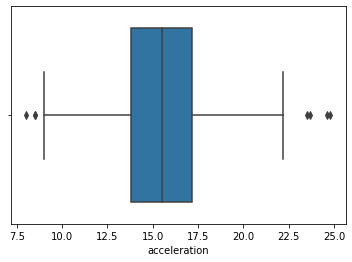

In [40]:
sns.boxplot(x='acceleration', data=df)
plt.show()
plt.close()

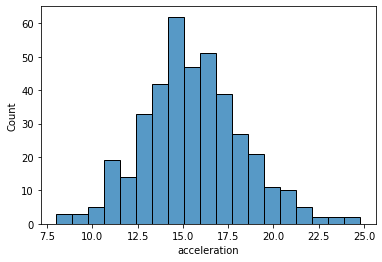

In [41]:
sns.histplot(x='acceleration', data=df)
plt.show()
plt.close()

In [42]:
df.acceleration.mad()

2.1425696320799963

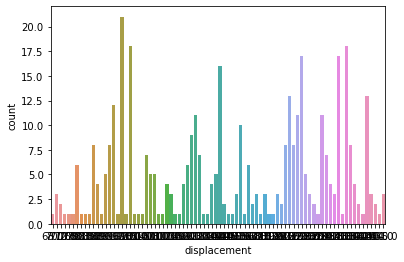

In [43]:
sns.countplot(x='displacement', data=df)
plt.show()
plt.close()

In [45]:
df.groupby('mpg').acceleration.max()

mpg
9.0     18.5
10.0    15.0
11.0    14.0
12.0    13.5
13.0    16.0
        ... 
43.4    23.7
44.0    24.6
44.3    21.7
44.6    13.8
46.6    17.9
Name: acceleration, Length: 129, dtype: float64

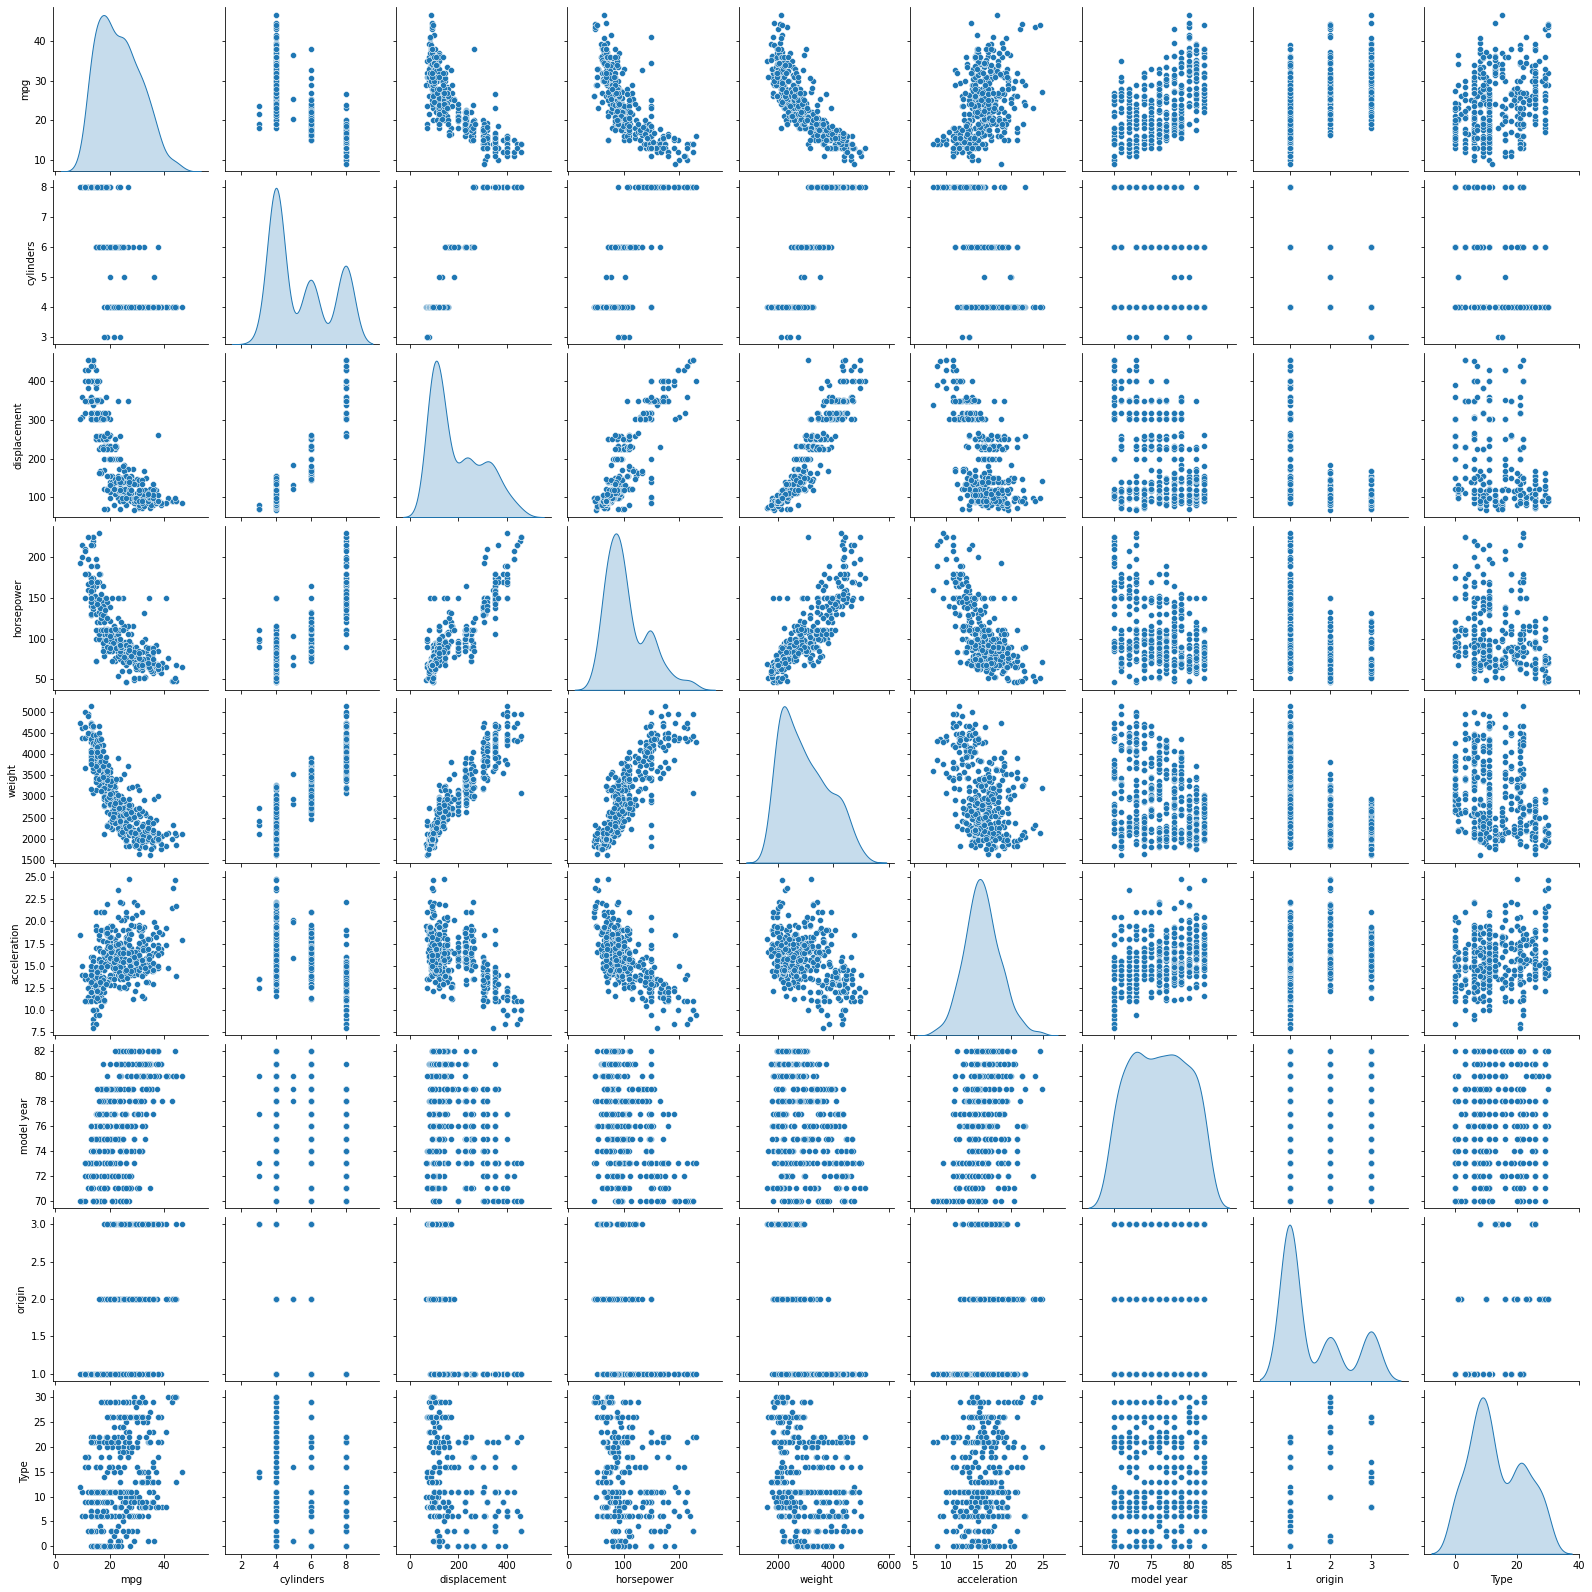

In [68]:
sns.pairplot(df1, diag_kind="kde")
plt.show()